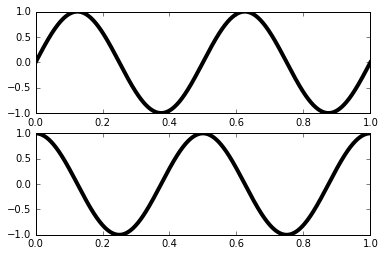

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig=plt.figure() #1
fs = 1000; #2
dur = 1; #3
t = np.linspace(0,dur,fs*dur); #4
freq = 2; #5
sinW = np.sin(2*np.pi*freq*t); #6
cosW = np.cos(2*np.pi*freq*t); #7
ax=plt.subplot(2,1,1) #8
ax.plot(t,sinW,c='k',lw=4) #9
ax=plt.subplot(2,1,2) #10
ax.plot(t,cosW,c='k',lw=4) #11

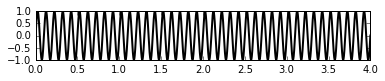

In [4]:
fig = plt.figure() #1
dur = 4 #2
t = np.linspace(0,dur,fs*dur) #3
freq = 10 #4
signal = np.sin(2*np.pi*freq*t) #5
ax = plt.subplot(4,1,1) #6
ax.plot(t,signal,c='k',lw=2) #7

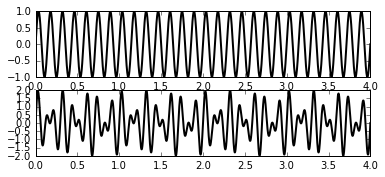

In [5]:
freq2 = 7; #1
signal2 = np.sin(2*np.pi*freq2*t); #2
ax=plt.subplot(3,1,2) #3
ax.plot(t,signal2,c='k',lw=2) #4
jointSignal = signal+signal2; #5
ax=plt.subplot(3,1,3) #6
ax.plot(t,jointSignal,c='k',lw=2) #7

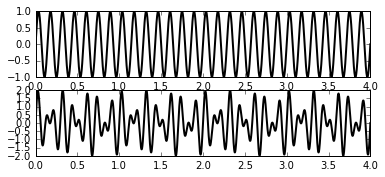

In [6]:
freq2 = 7; #1
signal2 = np.sin(2*np.pi*freq2*t); #2
ax=plt.subplot(3,1,2) #3
ax.plot(t,signal2,c='k',lw=2) #4
jointSignal = signal+signal2; #5
ax=plt.subplot(3,1,3) #6
ax.plot(t,jointSignal,c='k',lw=2) #7

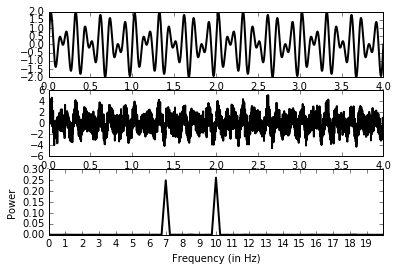

In [9]:
n = len(t) #1
noise = np.random.randn(n) #2
signalAndNoise = jointSignal + noise #3
fig = plt.figure() #4
ax = plt.subplot(3,1,1) #4
ax.plot(t,jointSignal,c='k',lw=2) #6
ax = plt.subplot(3,1,2) #7
ax.plot(t,signalAndNoise,c='k',lw=2) #8
nyquist = fs/2 #1
fSpaceSignal = np.fft.fft(signalAndNoise)/len(t) #2
fBase = np.linspace(0,nyquist,np.floor(len(signalAndNoise)/2)+1) #3
powerPlot = plt.subplot(3,1,3) #4
halfTheSignal = fSpaceSignal[:len(fBase)] #5
complexConjugate = np.conj(halfTheSignal)#6
powe = halfTheSignal*complexConjugate#7
powerPlot.plot(fBase,powe, c='k',lw=2) #8
powerPlot.set_xlim([0, 20]); #9
powerPlot.set_xticks(range(20));#10
powerPlot.set_xlabel('Frequency (in Hz)') #11
powerPlot.set_ylabel('Power')

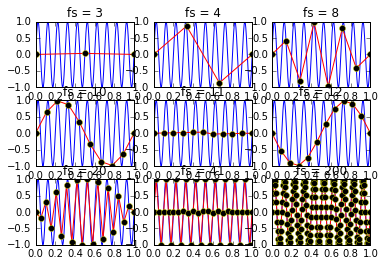

In [10]:
realSampling = 1000 #1
t = np.linspace(0,1,realSampling) #2
signalFrequency = 10 #3
samplingRate = [3, 4, 8, 10, 11, 12, 20, 41, 200] #4
signal = np.sin(2*np.pi*signalFrequency*t)#5
fig=plt.figure() #6
for ii,sampleRate in enumerate(samplingRate): #15
    ax = plt.subplot(3,3,ii+1)#7
    ax.plot(t,signal)#8
    sampledSignal = np.rint(np.linspace(0, len(t)-1, sampleRate)).astype(int)#10
    q = ax.plot(t[sampledSignal],signal[sampledSignal],c='r',marker='o',mfc='k',mec='y',
markersize=6); #11
    plt.title('fs = '+str(sampleRate)) #14

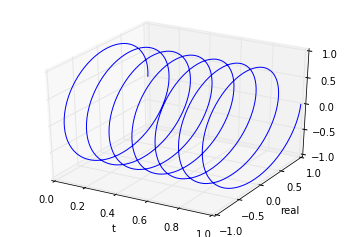

In [11]:
from mpl_toolkits.mplot3d import Axes3D #5
fig = plt.figure() #1
ax = fig.gca(projection='3d') #6
trace = np.exp(1j*2*np.pi*freq2*t); #2
plt.xlabel('t'); plt.ylabel('real'); #4
ax.plot(t,np.real(trace),np.imag(trace))#3

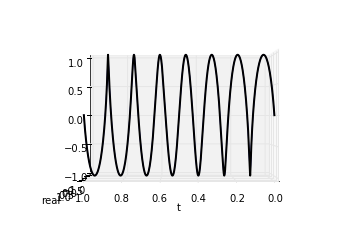

In [19]:
fig = plt.figure() #1
ax = fig.gca(projection='3d') #6
trace = np.exp(1j*2*np.pi*freq2*t); #2
plt.xlabel('t'); plt.ylabel('real'); #4
ax.plot(t,np.real(trace),np.imag(trace))#3
ax.plot(t,np.real(trace),np.imag(trace),c='k',lw=2) #2
ax.view_init(0, 90) #3, axes flipped in py

(0.0, 2.0, -1.0, 1.0)

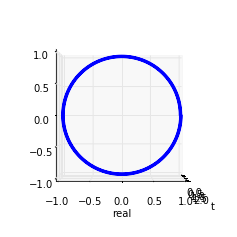

In [20]:
fig = plt.figure() #1
ax = fig.gca(projection='3d') #6
trace = np.exp(1j*2*np.pi*freq2*t); #2
plt.xlabel('t'); plt.ylabel('real'); #4
ax.plot(t,np.real(trace),np.imag(trace))#3
ax.view_init(0, 0) #1
plt.axis('square') #2

(0, 20)

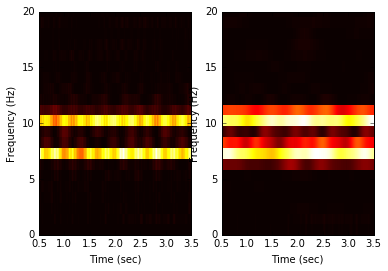

In [22]:
import scipy.signal as sg #13 
windLength = 1024; #1
wind = np.kaiser(windLength,0); #2
overl = len(wind)-1; #3
yFreqs = range(21); #4
fig = plt.figure() #5
plt.subplot(1,2,1) #6
f, tt, Sxx =sg.spectrogram(signalAndNoise,fs,wind,len(wind),overl) #7
plt.pcolormesh(tt,f,Sxx,cmap='hot') #!4
plt.ylabel('Frequency (Hz)');plt.xlabel('Time (sec)') #15 label axes
plt.ylim([0,20]) #16
wind = np.hanning(windLength);#8
plt.subplot(1,2,2) #9
f, tt, Sxx =sg.spectrogram(signalAndNoise,fs,wind,len(wind),overl) #7
plt.pcolormesh(tt,f,Sxx,cmap='hot') #14
plt.ylabel('Frequency (Hz)');plt.xlabel('Time (sec)')#15 label axes
plt.ylim([0,20]) #16

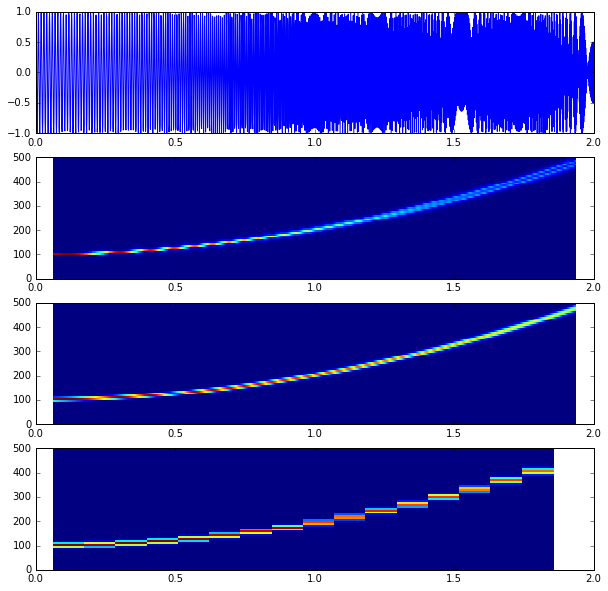

In [23]:
time = np.linspace(0,2,fs*2)#1
y=sg.chirp(time,100,1,200,'quadratic'); #2
#3 playing sounds is beyond "1" in Python
fig=plt.figure(figsize=(10,10))#4
ax = plt.subplot(4,1,1)#5
ax.plot(time,y) #6
ax = plt.subplot(4,1,2) #7
windLength = 128; #8
overl = windLength-1; #9
freqBins = 250; #10
wind=np.kaiser(windLength,0)
f, tt, Sxx =sg.spectrogram(y,fs,wind,len(wind),overl); #7
plt.pcolormesh(tt,f,Sxx);
ax = plt.subplot(4,1,3) #12
wind=np.hanning(windLength);
f, tt, Sxx =sg.spectrogram(y,fs,wind,len(wind),overl); #7
plt.pcolormesh(tt,f,Sxx)
ax = plt.subplot(4,1,4); #14
wind=sg.chebwin(windLength, at=100);
f, tt, Sxx =sg.spectrogram(y,fs,wind,len(wind)); #7
plt.pcolormesh(tt,f,Sxx);

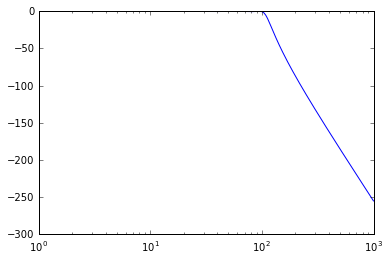

In [24]:
b1_low, a1_low = sg.butter(5, .2, 'low', analog=True)#1 
b2_low, a2_low = sg.butter(10, .2, 'low', analog=True)#2 
b3_low, a3_low = sg.cheby1(5, .2, 100, 'low', analog=True)#3 
b4_low, a4_low = sg.cheby1(5, .2, 100, 'low', analog=True)#4 
w, k = sg.freqs(b3_low, a3_low) #5
plt.semilogx(w, 20 * np.log(abs(k))) #5

In [25]:
B_low,A_low = sg.butter(8,0.6,btype='low',analog=True) #1
B_high,A_high = sg.butter(8,0.4,btype='high',analog=True) #2
winds = {}
winds['y'] = y
winds['yLow'] = sg.filtfilt(B_low,A_low,y); #3
winds['yHigh'] = sg.filtfilt(B_high,A_high,y);# %4
winds['yBand'] = sg.filtfilt(B_low,A_low,winds['yHigh']);#5

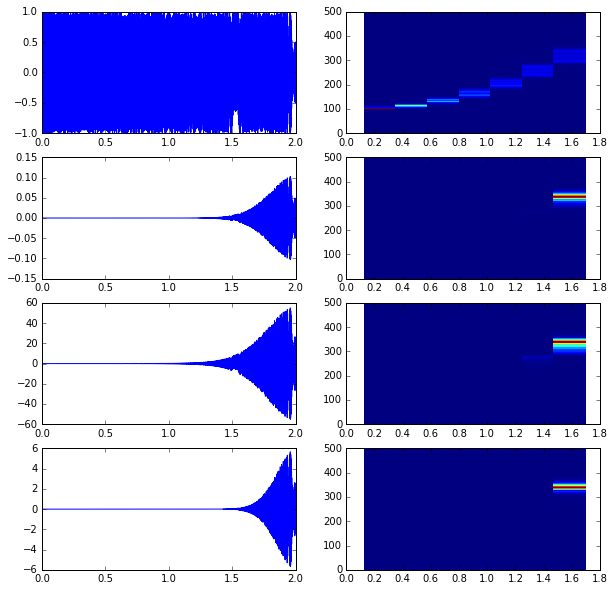

In [26]:
fig=plt.figure(figsize=(10,10))#1
overl = windLength-1; #2
signals = ['y','yLow','yHigh','yBand']; #3
counter = 1; #4
for ii in range(4): # 10
    for jj in range(2):# 9
        ax=plt.subplot(4,2,counter) # 5
        if counter%2 == 1: # 6
            ax.plot(time,winds[signals[ii]]) # 7
            counter = counter + 1; # 7
        else : #6
            f,tt,Sxx=sg.spectrogram(winds[signals[ii]],fs)
            plt.pcolormesh(tt,f,Sxx);
            counter = counter + 1; # 8